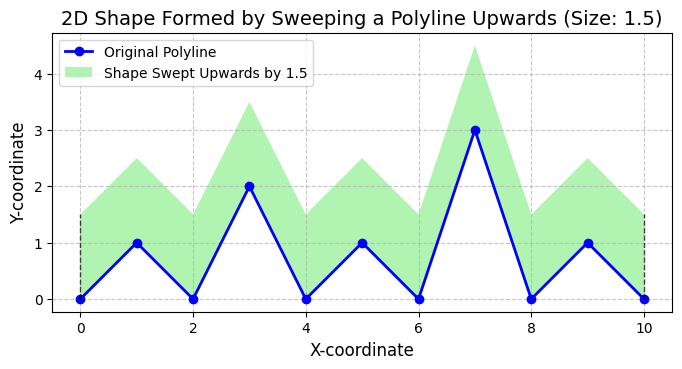

In [2]:
import matplotlib.pyplot as plt


def plot_swept_polygon(x: list, y: list, size: float):
    """
    Plots the 2D shape formed by sweeping a polyline upwards by a given size.

    Args:
        x (list): A list of x-coordinates for the polyline points.
        y (list): A list of y-coordinates for the polyline points.
        size (float): The distance by which the polyline is swept upwards.
    """

    if len(x) != len(y) or len(x) < 2:
        print("Error: x and y lists must have the same length and contain at least two points to form a polyline.")
        return

    # Create a new figure and axes
    fig, ax = plt.subplots(figsize=(8, 6))  # Adjust figure size for better visualization

    # Plot the original polyline
    ax.plot(x, y, "b-o", label="Original Polyline", linewidth=2)

    # Calculate and plot the vertices of the swept shape
    # The swept shape is a polygon where the bottom boundary is the original polyline,
    # and the top boundary is the original polyline shifted upwards by 'size'.
    # We need to list the vertices in order to form a closed polygon for ax.fill()

    x_polygon = []
    y_polygon = []

    # Add points from the original polyline (bottom boundary)
    for i in range(len(x)):
        x_polygon.append(x[i])
        y_polygon.append(y[i])

    # Add points from the swept polyline (top boundary), in reverse order
    # This ensures the polygon closes correctly.
    for i in range(len(x) - 1, -1, -1):
        x_polygon.append(x[i])
        y_polygon.append(y[i] + size)

    # Plot and fill the formed shape
    ax.fill(x_polygon, y_polygon, "lightgreen", alpha=0.7, label=f"Shape Swept Upwards by {size}")

    # Connect the start and end points of the original and swept polylines
    # These are the "sides" of the 3D extrusion, visualized in 2D
    if len(x) > 1:
        # Left connecting line
        ax.plot([x[0], x[0]], [y[0], y[0] + size], "k--", linewidth=1, alpha=0.7)
        # Right connecting line
        ax.plot([x[-1], x[-1]], [y[-1], y[-1] + size], "k--", linewidth=1, alpha=0.7)

    # Set plot title and axis labels
    ax.set_title(f"2D Shape Formed by Sweeping a Polyline Upwards (Size: {size})", fontsize=14)
    ax.set_xlabel("X-coordinate", fontsize=12)
    ax.set_ylabel("Y-coordinate", fontsize=12)
    ax.grid(True, linestyle="--", alpha=0.7)  # Enhance grid lines
    ax.legend(fontsize=10)  # Adjust legend font size
    ax.set_aspect("equal", adjustable="box")  # Maintain aspect ratio for better visualization

    # Auto-scale plot limits based on data
    ax.autoscale_view()

    # Show the plot
    plt.show()


# --- Complex Example ---
# A polyline resembling a "mountain range" or a "wave"
x_complex = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y_complex = [0, 1, 0, 2, 0, 1, 0, 3, 0, 1, 0]
size_complex = 1.5

plot_swept_polygon(x_complex, y_complex, size_complex)

# --- Another Example (L-shape) ---
# x_lshape = [0, 1, 1]
# y_lshape = [0, 0, 1]
# size_lshape = 0.5
# plot_swept_polygon(x_lshape, y_lshape, size_lshape)